# Decision trees

## Necessary imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics

import seaborn as sns

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

#pandas library

import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## loading and visualizing

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## Mapping 1-10 to 1-5 for better results

In [5]:
map = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
data.quality = data.quality.map(map)

In [6]:
data.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

## Data splitting (training 1000 / testing 599)

In [58]:
df_train = data.head(1000)
df_label = df_train['quality']
df_train = df_train.drop('quality', axis = 1)

In [59]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kfold
0,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,0
1,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,0
2,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,0
3,8.9,0.840,0.34,1.4,0.050,4.0,10.0,0.99554,3.12,0.48,9.1,0
4,7.4,0.530,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2,0


In [60]:
df_test = data.tail(599)
test_label = df_test['quality']
df_test= df_test.drop('quality', axis = 1)

## Decision tree implementation

In [61]:
train_acc = [0.5]
test_acc = [0.5]
for depth in range(1, 20):
    clf = DecisionTreeClassifier(max_depth = depth)
    
    clf.fit(df_train, df_label)
    
    train_pred = clf.predict(df_train)
    acc_train = metrics.accuracy_score(df_label, train_pred)
    
    test_pred = clf.predict(df_test)
    acc_test = metrics.accuracy_score(test_label, test_pred)
    
    train_acc.append(acc_train)
    test_acc.append(acc_test)

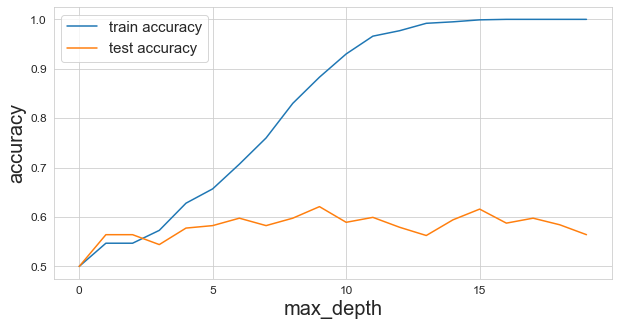

In [62]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_acc, label = 'train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.legend(loc='upper left', prop = {'size': 15})
plt.xticks(range(0, 20, 5))
plt.xlabel('max_depth', size = 20)
plt.ylabel('accuracy', size = 20)
plt.show()

From the graph plotted above it is quite clear that the model fails in predicting most real world data accurately, with the highest accuracy of approx 0.57 at the max depth of 5. The model overfits as the train accuracy is much higher than the test accuracy.

## Trying different depths

In [42]:
train_acc = [0.5]
test_acc = [0.5]
for depth in range(1, 40):
    clf = DecisionTreeClassifier(max_depth = depth)
    
    clf.fit(df_train, df_label)
    
    train_pred = clf.predict(df_train)
    acc_train = metrics.accuracy_score(df_label, train_pred)
    
    test_pred = clf.predict(df_test)
    acc_test = metrics.accuracy_score(test_label, test_pred)
    
    train_acc.append(acc_train)
    test_acc.append(acc_test)

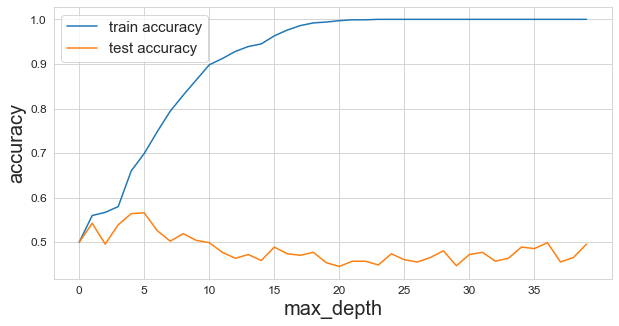

In [43]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_acc, label = 'train accuracy')
plt.plot(test_acc, label = 'test accuracy')
plt.legend(loc='upper left', prop = {'size': 15})
plt.xticks(range(0, 40, 5))
plt.xlabel('max_depth', size = 20)
plt.ylabel('accuracy', size = 20)
plt.show()

## Cross validation with k folds

In [13]:
#Applying KFold Cross validation
#create a new column kfold with entries -1
data['kfold'] = -1
#Shuffle data
data = data.sample(frac = 1).reset_index(drop = True)
#Split data into 10 folds
kf = model_selection.KFold(n_splits = 10)
for fold, (t, v) in enumerate(kf.split(X=data)):
    data.loc[v, 'kfold'] = fold
#Saving data for further use
data.to_csv('t_fold.csv', index = False)

In [28]:
def check(fold):
    df = pd.read_csv('./t_fold.csv')
    df_train = df[df.kfold != fold].reset_index(drop = True)
    df_test = df[df.kfold == fold].reset_index(drop = True)  
    
    y_train = df_train.quality.values
    x_train = df_train.drop('quality', axis = 1).values
    
    y_valid = df_test.quality.values
    x_valid = df_test.drop('quality', axis = 1).values
    
    ktrain_acc = [0.5]
    ktest_acc = [0.5]
    for depth in range(1, 20):
        clf = DecisionTreeClassifier(max_depth = depth)

        clf.fit(x_train, y_train)

        train_pred = clf.predict(x_train)
        acc_train = metrics.accuracy_score(y_train, train_pred)

        test_pred = clf.predict(x_valid)
        acc_test = metrics.accuracy_score(y_valid, test_pred)

        ktrain_acc.append(acc_train)
        ktest_acc.append(acc_test)
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    plt.plot(ktrain_acc, label = 'train accuracy')
    plt.plot(ktest_acc, label = 'test accuracy')
    plt.legend(loc='upper left', prop = {'size': 15})
    plt.xticks(range(0, 20, 5))
    plt.xlabel('max_depth', size = 20)
    plt.ylabel('accuracy', size = 20)
    plt.show()

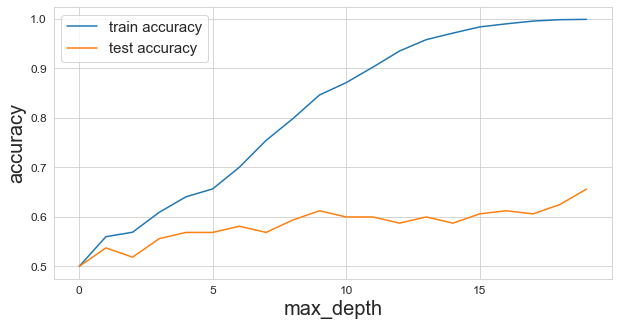

In [15]:
check(fold = 0)

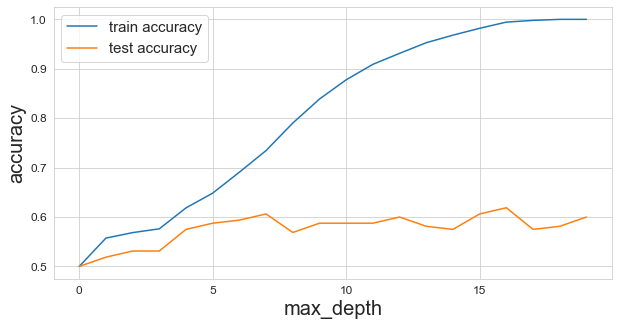

In [16]:
check(fold = 1)

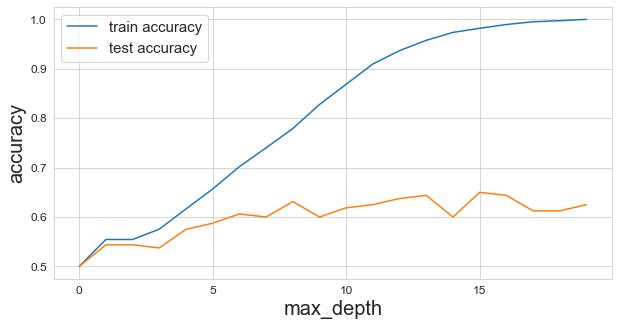

In [17]:
check(fold = 2)

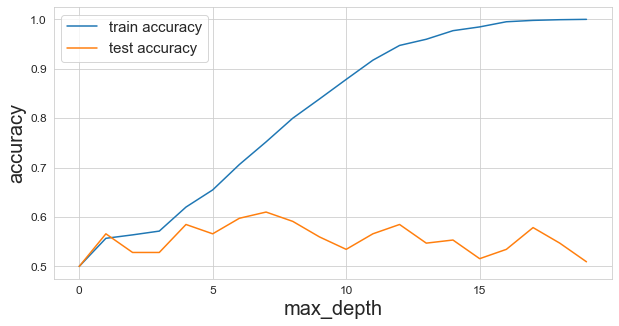

In [19]:
check(fold = 9)

In [44]:
X = pd.read_csv('./t_fold.csv')
y = X.quality.values
X = X.drop('quality', axis = 1).values
clf = DecisionTreeClassifier(max_depth = 20)
scores = model_selection.cross_val_score(clf, X, y, cv=10)
print(scores)

[0.5875     0.575      0.6875     0.64375    0.575      0.63125
 0.63125    0.70625    0.56875    0.62893082]


In [45]:
#Calculating the average
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.09)


Still overfitting but better results than just fitting the data to the model